# USBLS: Unemployment Rates, January 1948 - August 2016

*Note: Dataset and exercises are taken from Dataquest's **Exploratory Data Visualization** course, specifically the **Line Charts** and **Multiple Plots** chapters, but the code below are mine. I replaced repetitive code — originally carried over from one exercise to another, or one chapter to another — with reusable code, like global variables and functions.*

## Dataset: Monthly Unemployment

The United States Bureau of Labor Statistics (BLS) surveys, calculates, and reports on the monthly unemployment rate. The numbers come from a sample of [60,000 eligible households](https://www.bls.gov/cps/cps_htgm.htm) (or approximately 110,000 individuals) from 800 geographic areas, which represent each state and the District of Columbia. Based on a specific set of questions, a software identifies individuals as employed, unemployed, or not in the labor force; these counts eventually determine the unemployment rate.

Although the BLS releases monthly unemployment data available for download as an Excel file, the dataset used here is from the website of the Federal Reserve Bank of St. Louis. This time series dataset is in .csv, and contains the monthly unemployment rate from January 1948 to August 2016. 

Here's a preview of the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

unrate = pd.read_csv('datasets/unrate.csv')
unrate.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
DATE,1948-01-01,1948-02-01,1948-03-01,1948-04-01,1948-05-01,1948-06-01,1948-07-01,1948-08-01,1948-09-01,1948-10-01,1948-11-01,1948-12-01
VALUE,3.4,3.8,4,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4


In [2]:
unrate.describe().T

,count,mean,std,min,25%,50%,75%,max
VALUE,824.0,5.815898,1.639585,2.5,4.7,5.6,6.9,10.8


Based on the results of the describe() function above, it looks like the `DATE` column needs to be converted to a datetime format.

In [3]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate['DATE'].head()

0   1948-01-01
1   1948-02-01
2   1948-03-01
3   1948-04-01
4   1948-05-01
Name: DATE, dtype: datetime64[ns]

In [4]:
unrate.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
DATE,1948-01-01 00:00:00,1948-02-01 00:00:00,1948-03-01 00:00:00,1948-04-01 00:00:00,1948-05-01 00:00:00,1948-06-01 00:00:00,1948-07-01 00:00:00,1948-08-01 00:00:00,1948-09-01 00:00:00,1948-10-01 00:00:00,1948-11-01 00:00:00,1948-12-01 00:00:00
VALUE,3.4,3.8,4,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4


## Exercises: Line Graphs

### Single Plot
Below is a simple line chart that visualizes the unemployment rates from 1948.

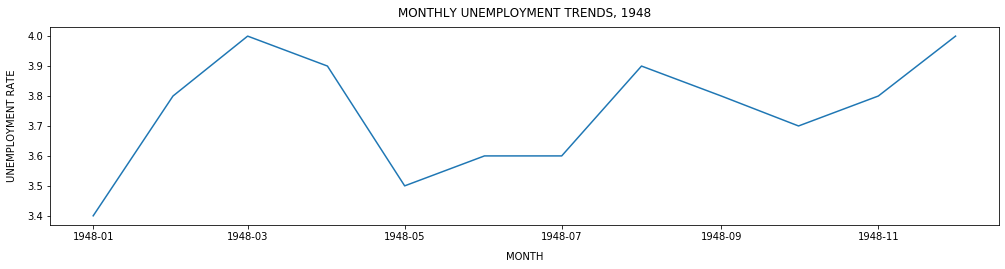

In [5]:
def split_years(n):
    fig = plt.figure(figsize=(17,24))

    for x in range(n):
        y = x + 1
        x12 = x * 12 
        y12 = y * 12
        start_year = 1948
        fig.add_subplot(5,1,y).plot(unrate['DATE'][x12:y12], unrate['VALUE'][x12:y12])
        fig.subplots_adjust(hspace = 0.4)
        plt.title('Monthly Unemployment Trends, {}'.format(str(start_year + x)).upper(), pad=10)
        plt.xlabel('Month'.upper(), labelpad=10)
        plt.ylabel('Unemployment Rate'.upper(), labelpad=10)

    plt.show()
    
split_years(1)

### Multiple Plots

Below is a series of simple line charts, visualizing the unemployment rates from 1948 - 1952

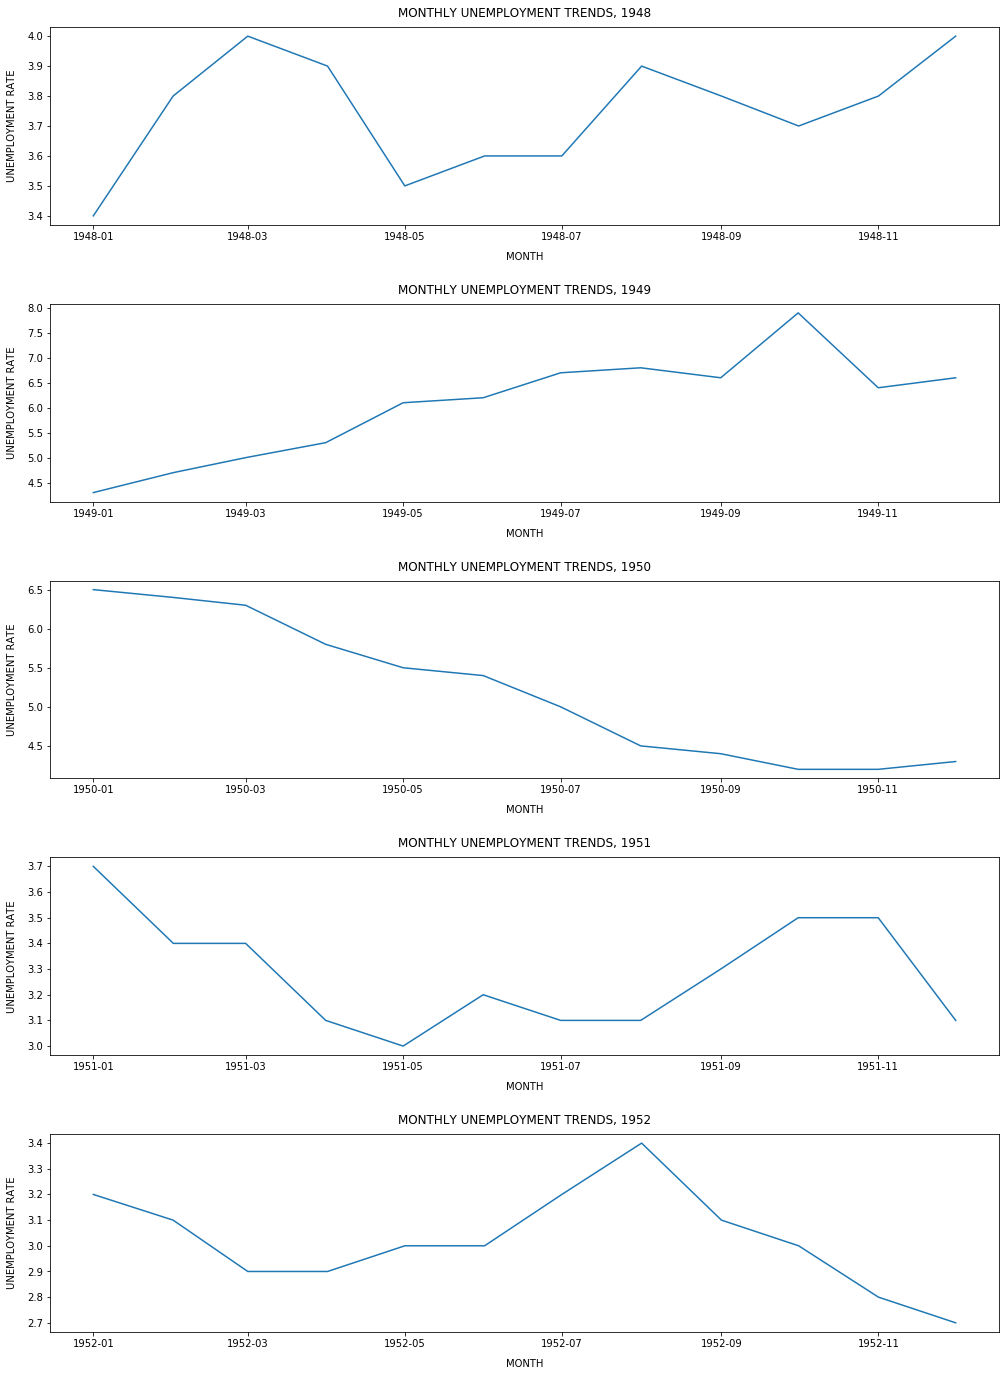

In [6]:
split_years(5)

In [7]:
unrate['MONTH'] = unrate['DATE'].dt.month

def overlap_years(count=1, start=1948):
    colors = ['red', 'blue', 'green', 'orange', 'black']
    end = start + (count - 1)

    fig = plt.figure(figsize=(17,4))
    for i in range(count):
        start_index = i*12
        end_index = (i+1)*12
        subset = unrate[start_index:end_index]
        label = str(start + i)
        plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

    plt.legend(loc='upper left')

    if start == end:
        plt.title('Monthly Unemployment Trends, {}'.format(str(start)).upper(), pad=20)
    else:
        plt.title('Monthly Unemployment Trends, {0}-{1}'.format(str(start), str(end)).upper(), pad=20)
    plt.xlabel('Month, Integer'.upper(), labelpad=10)
    plt.ylabel('Unemployment Rate, Percent'.upper(), labelpad=10)

    plt.show()

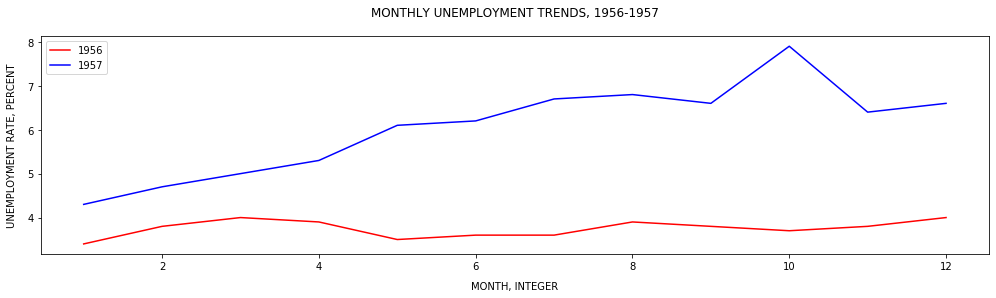

In [8]:
overlap_years(count=2, start=1956)

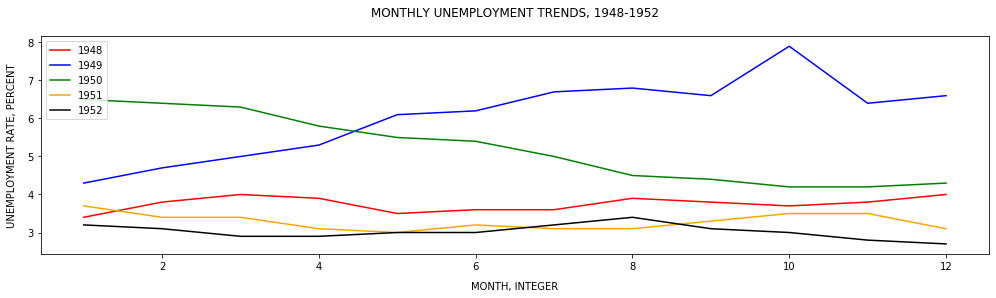

In [9]:
overlap_years(count=5, start=1948)